In [ ]:
from google.colab import drive
drive.mount('/content/drive') #구글 드라이브에 연결하는 코드

Mounted at /content/drive


In [ ]:
import torch
from torch import nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np 
import pickle

device = 'cuda' if torch.cuda.is_available() else 'cpu' #GPU 사용 설정

pred_dataset_path = '/content/drive/MyDrive/emotion_proj/data/pred_data2.pkl' 


In [ ]:
#train_dataset, test_dataset pkl 파일 불러오기 
with open(pred_dataset_path, 'rb') as f:
  pred_dataset = pickle.load(f)

In [ ]:
pred_dataset[0].size

2304

In [ ]:
#라벨값에 해당하는 숫자를 label_set에 저장.
label_set = {'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6,
}

In [ ]:
pred_data = []
for img in pred_dataset:
  pred_data.append((img.reshape(1,48,48)))

In [ ]:
# 자료형을 텐서로 변경해서 train, test에 저장. -> Data load 할 준비 완료
# pred = [(torch.tensor(im,dtype=torch.float32)) for im in pred_data]
pred = torch.stack([torch.tensor(im, dtype=torch.float32) for im in pred_data])  # (N, 48, 48)


In [ ]:
pred[0][0].shape

torch.Size([48, 48])

In [ ]:
#Hyper parameter 설정 
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 1e-3

In [ ]:
# DataLoader 
pred_loader = DataLoader(pred, batch_size = BATCH_SIZE, shuffle=True) #drop_last = True

# 전이학습
- 이전에 training했던 모델을 가지고와서 조금만 training하면 내가 원하는데이터에 적용 가능할것이다


In [ ]:
from torchvision import models
# 모델 불러오기
model = models.resnet18()
model.fc = nn.Linear(in_features=512, out_features=7)
model.conv1=nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
# pre trained model
model.load_state_dict(torch.load("/content/drive/MyDrive/emotion_proj/best_model.pt"))

<All keys matched successfully>

In [ ]:
model.to(device)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
from torch import optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [ ]:
pred.shape

torch.Size([23705, 1, 48, 48])

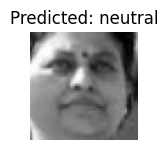

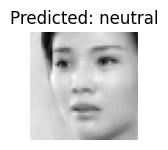

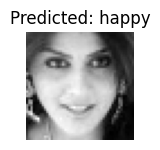

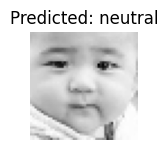

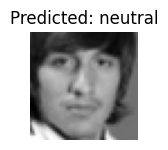

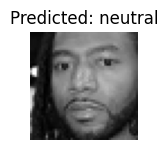

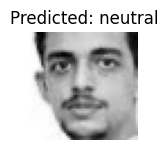

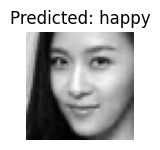

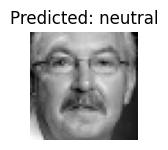

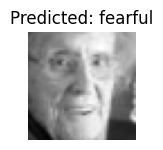

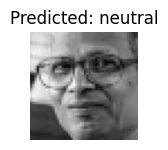

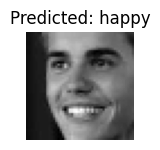

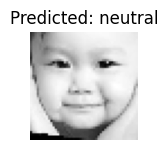

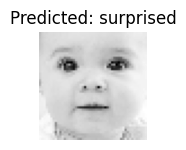

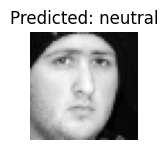

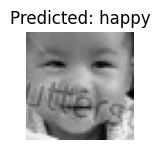

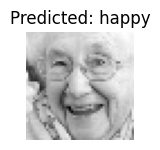

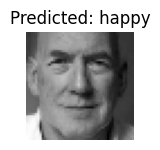

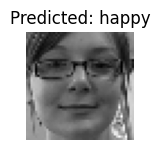

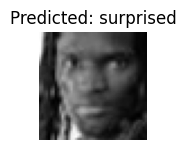

In [ ]:
import numpy as np
from tqdm.auto import tqdm
from IPython.display import clear_output

for epoch in range(EPOCHS):
  with torch.no_grad():
    for img in pred_loader:
      pred = model(img.to(device))
      _, predicted = torch.max(pred.data, 1)  # 예측된 라벨
  # clear_output()

# predicted 변수에는 각 이미지별로 예측된 라벨이 저장되어 있습니다. 
# 이를 label_list의 인덱스로 활용하여 예측된 라벨명을 가져와 plt.title() 부분에 추가해주었습니다. 
# predicted 변수의 인덱스는 img와 매칭되므로, img[1]의 예측 결과를 출력하도록 설정되어 있습니다. 
# 이를 원하는 인덱스로 변경하시면 됩니다.

  label_list = ['angry','disgusted','fearful','happy','neutral','sad','surprised']

  plt.subplot(1,4,1)
  plt.imshow(img[1][0], cmap='gray')    
  plt.title("Predicted: {}".format(label_list[predicted[1]]))  # 예측된 라벨 출력

  # plt.title("result{}".format(pred))
  plt.axis('off')
  plt.show()